In [1]:
#DS Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

#SKlearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#helpers
%matplotlib inline

In [2]:
rawData=pd.read_csv('Credit_One_Data.csv')

In [3]:
rawData.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,1,20000,0,3,1,24,2,2,-1,...,0,0,0,0,689,0,0,0,0,0
1,1,2,120000,0,3,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,2,3,90000,0,3,2,34,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,3,4,50000,0,3,1,37,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,4,5,50000,1,3,1,57,-1,0,-1,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [4]:
rawData.dtypes

Unnamed: 0                    int64
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

### X = 'limit_bal', 'sex', 'educaion', 'marriage', 'age',  y =  'default payment next month' 

In [5]:
#selecting data
#features
X = rawData.iloc[:,2:7]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,0,3,1,24
1,120000,0,3,2,26
2,90000,0,3,2,34
3,50000,0,3,1,37
4,50000,1,3,1,57


In [6]:
# select the Y variable
y = rawData['default payment next month']

In [7]:
print(y)

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: default payment next month, Length: 30000, dtype: int64


In [8]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 5), (9000, 5))

In [9]:
# Modelling (DecisionTreeClassifier)

algo_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc = algo_dtc.fit(X_train, y_train)

In [10]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.52      0.01      0.01      1948
           1       0.78      1.00      0.88      7052

    accuracy                           0.78      9000
   macro avg       0.65      0.50      0.45      9000
weighted avg       0.73      0.78      0.69      9000



In [11]:
from sklearn.tree import plot_tree

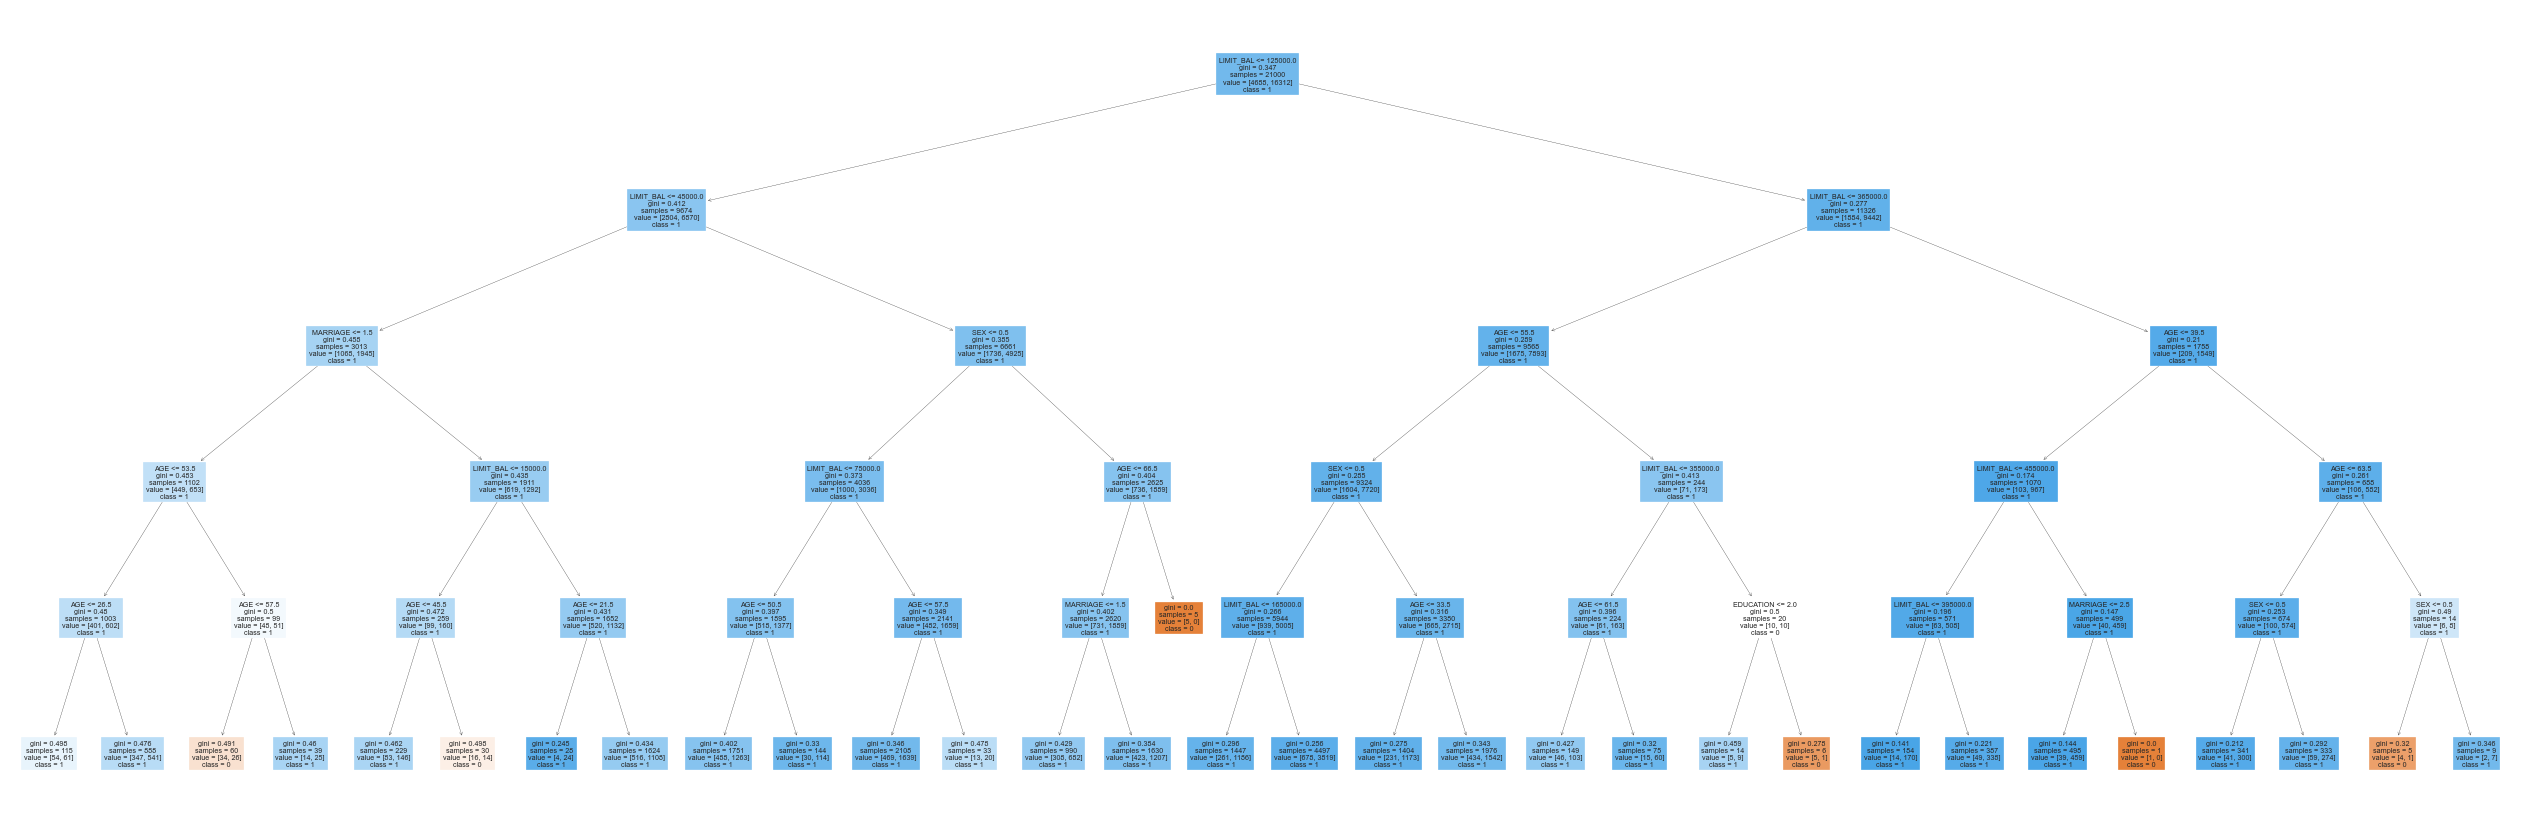

In [12]:
# plot the tree

fig = plt.figure(figsize=(45, 15))
tree = plot_tree(model_dtc, feature_names=X.columns, class_names=['0','1'], filled=True)

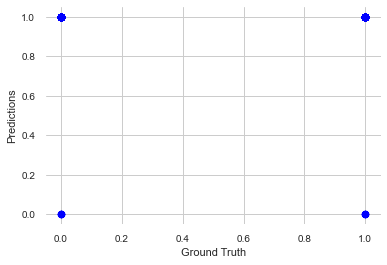

In [13]:
plt.scatter(y_test, preds, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.grid()
plt.show();

### use Random Forest Classifier

In [14]:
X = rawData.iloc[:,2:7]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE
0,20000,0,3,1,24
1,120000,0,3,2,26
2,90000,0,3,2,34
3,50000,0,3,1,37
4,50000,1,3,1,57


In [15]:
# select the Y variable
y = rawData['default payment next month']

In [16]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 5), (9000, 5))

In [17]:
# Modelling (RandomForestClassifier)

algo_rfc = RandomForestClassifier(max_depth=5)
model_rfc = algo_rfc.fit(X_train, y_train)

In [18]:
# predictions

preds = model_rfc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1948
           1       0.78      1.00      0.88      7052

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.69      9000



/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### use Gradient Boosting Classifier

In [19]:
# Modelling (GradientBoostingClassifier)

algo_gbc = GradientBoostingClassifier(max_depth=5)
model_gbc = algo_gbc.fit(X_train, y_train)

In [20]:
# predictions

preds = model_gbc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.35      0.01      0.02      1948
           1       0.78      0.99      0.88      7052

    accuracy                           0.78      9000
   macro avg       0.57      0.50      0.45      9000
weighted avg       0.69      0.78      0.69      9000



## include 'pay_amt 1-6' 'bill_amt1-6" to X dependent var, y='default payment' 

In [21]:
#features
X = rawData.iloc[:,[2,3,4,5,6,13,14,15,16,17,18,19,20,21,22,23,24]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,3,1,24,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,0,3,2,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,3,2,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,3,1,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,3,1,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [22]:
# select the Y variable
y = rawData['default payment next month']
print(y)

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: default payment next month, Length: 30000, dtype: int64


In [23]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 17), (9000, 17))

In [24]:
# Modelling (DecisionTreeClassifier)

algo_dtc = DecisionTreeClassifier(max_depth=3)
model_dtc = algo_dtc.fit(X_train, y_train)

In [25]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.59      0.05      0.10      1948
           1       0.79      0.99      0.88      7052

    accuracy                           0.79      9000
   macro avg       0.69      0.52      0.49      9000
weighted avg       0.75      0.79      0.71      9000



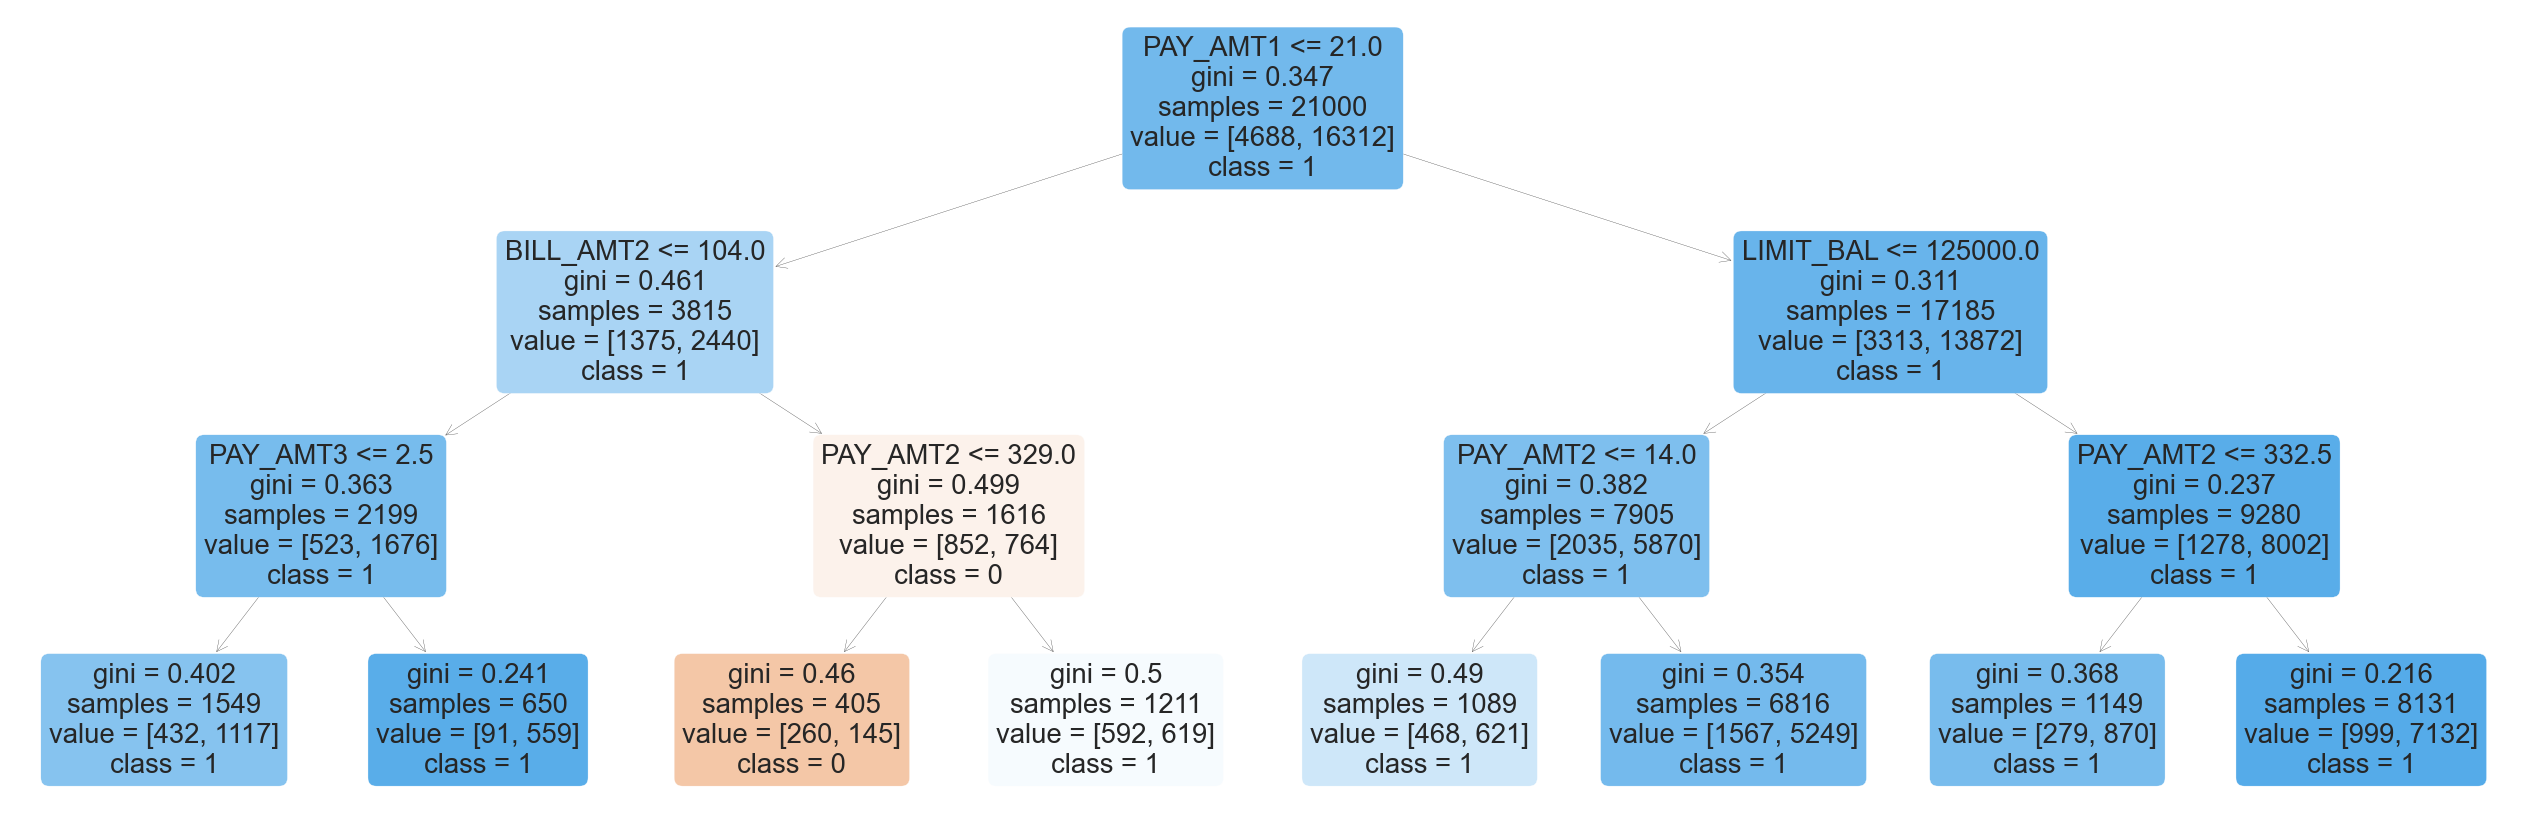

In [26]:
# plot the tree

from sklearn.tree import plot_tree

fig = plt.figure(figsize=(45, 15))
tree = plot_tree(model_dtc, feature_names=X.columns, class_names=['0','1'], filled=True, rounded=True)

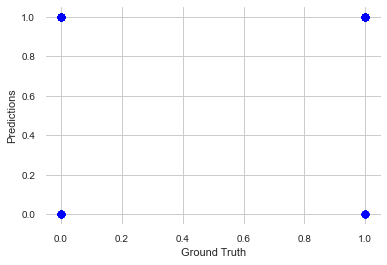

In [27]:
plt.scatter(y_test, preds, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.grid()
plt.show();

### use Random Forest Classifier

In [28]:
# Modelling (RandomForestClassifier)

algo_rfc = RandomForestClassifier(max_depth=5)
model_rfc = algo_rfc.fit(X_train, y_train)

In [29]:
# predictions

preds = model_rfc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      0.04      0.07      1948
           1       0.79      0.99      0.88      7052

    accuracy                           0.79      9000
   macro avg       0.73      0.52      0.48      9000
weighted avg       0.76      0.79      0.71      9000



### use Gradient Boosting Classifier

In [30]:
# Modelling (GradientBoostingClassifier)

algo_gbc = GradientBoostingClassifier(max_depth=5)
model_gbc = algo_gbc.fit(X_train, y_train)

In [31]:
# predictions

preds = model_gbc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.55      0.21      0.31      1948
           1       0.81      0.95      0.88      7052

    accuracy                           0.79      9000
   macro avg       0.68      0.58      0.59      9000
weighted avg       0.76      0.79      0.75      9000



### X =  all the columns except 'default payment'  to see if it affects the score

In [32]:
#features
X = rawData.iloc[:,2:25]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,0,3,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,0,3,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,0,3,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,0,3,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,3,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [33]:
# select the Y variable
y = rawData['default payment next month']
y

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: default payment next month, Length: 30000, dtype: int64

In [34]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

In [35]:
# Modelling (DecisionTreeClassifier)

algo_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc = algo_dtc.fit(X_train, y_train)

In [36]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.38      0.47      1948
           1       0.85      0.94      0.89      7052

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [37]:
# Modelling (RandomForestClassifier)

algo_rfc = RandomForestClassifier(max_depth=5)
model_rfc = algo_rfc.fit(X_train, y_train)

In [38]:
# predictions

preds = model_rfc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.67      0.30      0.41      1948
           1       0.83      0.96      0.89      7052

    accuracy                           0.82      9000
   macro avg       0.75      0.63      0.65      9000
weighted avg       0.80      0.82      0.79      9000



In [39]:
# Modelling (GradientBoostingClassifier)

algo_gbc = GradientBoostingClassifier(max_depth=5)
model_gbc = algo_gbc.fit(X_train, y_train)

In [40]:
# predictions

preds = model_gbc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.63      0.37      0.47      1948
           1       0.84      0.94      0.89      7052

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



###  X='limit_bal'  'bill_amt1-bill_amt6' 'pay_amt1-pay_amt6', y=  'default payment' 

In [41]:
#features
X = rawData.iloc[:,[2,13,14,15,16,17,18,19,20,21,22,23,24]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [42]:
# select the Y variable
y = rawData['default payment next month']
y

0        0
1        0
2        1
3        1
4        1
        ..
29995    1
29996    1
29997    0
29998    0
29999    0
Name: default payment next month, Length: 30000, dtype: int64

In [43]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 13), (9000, 13))

In [44]:
# Modelling (DecisionTreeClassifier)

algo_dtc = DecisionTreeClassifier(max_depth=5)
model_dtc = algo_dtc.fit(X_train, y_train)

In [45]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31      1948
           1       0.81      0.94      0.87      7052

    accuracy                           0.78      9000
   macro avg       0.66      0.58      0.59      9000
weighted avg       0.75      0.78      0.75      9000



In [46]:
# Modelling (RandomForestClassifier)

algo_rfc = RandomForestClassifier(max_depth=5)
model_rfc = algo_rfc.fit(X_train, y_train)

In [47]:
# predictions

preds = model_rfc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.69      0.03      0.06      1948
           1       0.79      1.00      0.88      7052

    accuracy                           0.79      9000
   macro avg       0.74      0.51      0.47      9000
weighted avg       0.77      0.79      0.70      9000



In [48]:
# Modelling (GradientBoostingClassifier)

algo_gbc = GradientBoostingClassifier(max_depth=5)
model_gbc = algo_gbc.fit(X_train, y_train)

In [49]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31      1948
           1       0.81      0.94      0.87      7052

    accuracy                           0.78      9000
   macro avg       0.66      0.58      0.59      9000
weighted avg       0.75      0.78      0.75      9000



### X=all columns,  'LIMIT_BAL' = y dependable

In [50]:
#selecting data
#features
X = rawData.iloc[:,3:26]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,3,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,0
1,0,3,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,0,3,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,0,3,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,1,3,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [51]:
# discretize'LIMIT_BAL'

pd.qcut(rawData['LIMIT_BAL'], q=6)

0         (9999.999, 50000.0]
1         (80000.0, 140000.0]
2         (80000.0, 140000.0]
3         (9999.999, 50000.0]
4         (9999.999, 50000.0]
                 ...         
29995    (200000.0, 300000.0]
29996    (140000.0, 200000.0]
29997     (9999.999, 50000.0]
29998      (50000.0, 80000.0]
29999     (9999.999, 50000.0]
Name: LIMIT_BAL, Length: 30000, dtype: category
Categories (6, interval[float64]): [(9999.999, 50000.0] < (50000.0, 80000.0] < (80000.0, 140000.0] < (140000.0, 200000.0] < (200000.0, 300000.0] < (300000.0, 1000000.0]]

In [52]:
limitbal_qcut = pd.qcut(rawData['LIMIT_BAL'], q=6, labels=False)

In [53]:
limitbal_qcut

0        0
1        2
2        2
3        0
4        0
        ..
29995    4
29996    3
29997    0
29998    1
29999    0
Name: LIMIT_BAL, Length: 30000, dtype: int64

In [54]:
y=limitbal_qcut

In [55]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

In [56]:
# Modelling (DecisionTreeClassifier)

algo_dtc = DecisionTreeClassifier(max_depth=3)
model_dtc = algo_dtc.fit(X_train, y_train)

In [57]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.54      0.89      0.67      2301
           1       0.45      0.41      0.43       955
           2       0.47      0.34      0.39      1297
           3       0.00      0.00      0.00      1580
           4       0.43      0.21      0.28      1567
           5       0.27      0.56      0.36      1300

    accuracy                           0.44      9000
   macro avg       0.36      0.40      0.36      9000
weighted avg       0.37      0.44      0.38      9000



/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [58]:
# Modelling (RandomForestClassifier)

algo_rfc = RandomForestClassifier(max_depth=5)
model_rfc = algo_rfc.fit(X_train, y_train)

In [59]:
# predictions

preds = model_rfc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.55      0.90      0.68      2301
           1       0.54      0.35      0.42       955
           2       0.47      0.37      0.41      1297
           3       0.36      0.25      0.29      1580
           4       0.36      0.33      0.35      1567
           5       0.47      0.39      0.42      1300

    accuracy                           0.48      9000
   macro avg       0.46      0.43      0.43      9000
weighted avg       0.46      0.48      0.45      9000



In [60]:
# Modelling (GradientBoostingClassifier)

algo_gbc = GradientBoostingClassifier(max_depth=5)
model_gbc = algo_gbc.fit(X_train, y_train)

In [61]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.54      0.89      0.67      2301
           1       0.45      0.41      0.43       955
           2       0.47      0.34      0.39      1297
           3       0.00      0.00      0.00      1580
           4       0.43      0.21      0.28      1567
           5       0.27      0.56      0.36      1300

    accuracy                           0.44      9000
   macro avg       0.36      0.40      0.36      9000
weighted avg       0.37      0.44      0.38      9000



/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

### X=edu, age, bill_amt1-6, pay_amt1-6, default payment, y=limit_bal

In [62]:
#features
X = rawData.iloc[:,[4,6,13,14,15,16,17,18,19,20,21,22,23,24,25]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,EDUCATION,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,3,24,3913,3102,689,0,0,0,0,689,0,0,0,0,0
1,3,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,0
2,3,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1
3,3,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1
4,3,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,1


In [63]:
y=limitbal_qcut
y

0        0
1        2
2        2
3        0
4        0
        ..
29995    4
29996    3
29997    0
29998    1
29999    0
Name: LIMIT_BAL, Length: 30000, dtype: int64

In [64]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 15), (9000, 15))

In [65]:
# Modelling (DecisionTreeClassifier)

algo_dtc = DecisionTreeClassifier(max_depth=3)
model_dtc = algo_dtc.fit(X_train, y_train)

In [66]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.64      0.79      0.70      2301
           1       0.45      0.41      0.43       955
           2       0.47      0.34      0.39      1297
           3       0.00      0.00      0.00      1580
           4       0.30      0.62      0.40      1567
           5       0.38      0.31      0.34      1300

    accuracy                           0.45      9000
   macro avg       0.37      0.41      0.38      9000
weighted avg       0.38      0.45      0.40      9000



/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [67]:
# Modelling (RandomForestClassifier)

algo_rfc = RandomForestClassifier(max_depth=5)
model_rfc = algo_rfc.fit(X_train, y_train)

In [68]:
# predictions

preds = model_rfc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      2301
           1       0.53      0.35      0.42       955
           2       0.48      0.36      0.41      1297
           3       0.34      0.32      0.33      1580
           4       0.38      0.30      0.33      1567
           5       0.47      0.37      0.42      1300

    accuracy                           0.48      9000
   macro avg       0.46      0.43      0.43      9000
weighted avg       0.46      0.48      0.46      9000



In [69]:
# Modelling (GradientBoostingClassifier)

algo_gbc = GradientBoostingClassifier(max_depth=3)
model_gbc = algo_gbc.fit(X_train, y_train)

In [70]:
# predictions

preds = model_gbc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.65      0.88      0.74      2301
           1       0.53      0.39      0.45       955
           2       0.46      0.39      0.42      1297
           3       0.36      0.30      0.33      1580
           4       0.37      0.35      0.36      1567
           5       0.47      0.44      0.45      1300

    accuracy                           0.50      9000
   macro avg       0.47      0.46      0.46      9000
weighted avg       0.48      0.50      0.48      9000



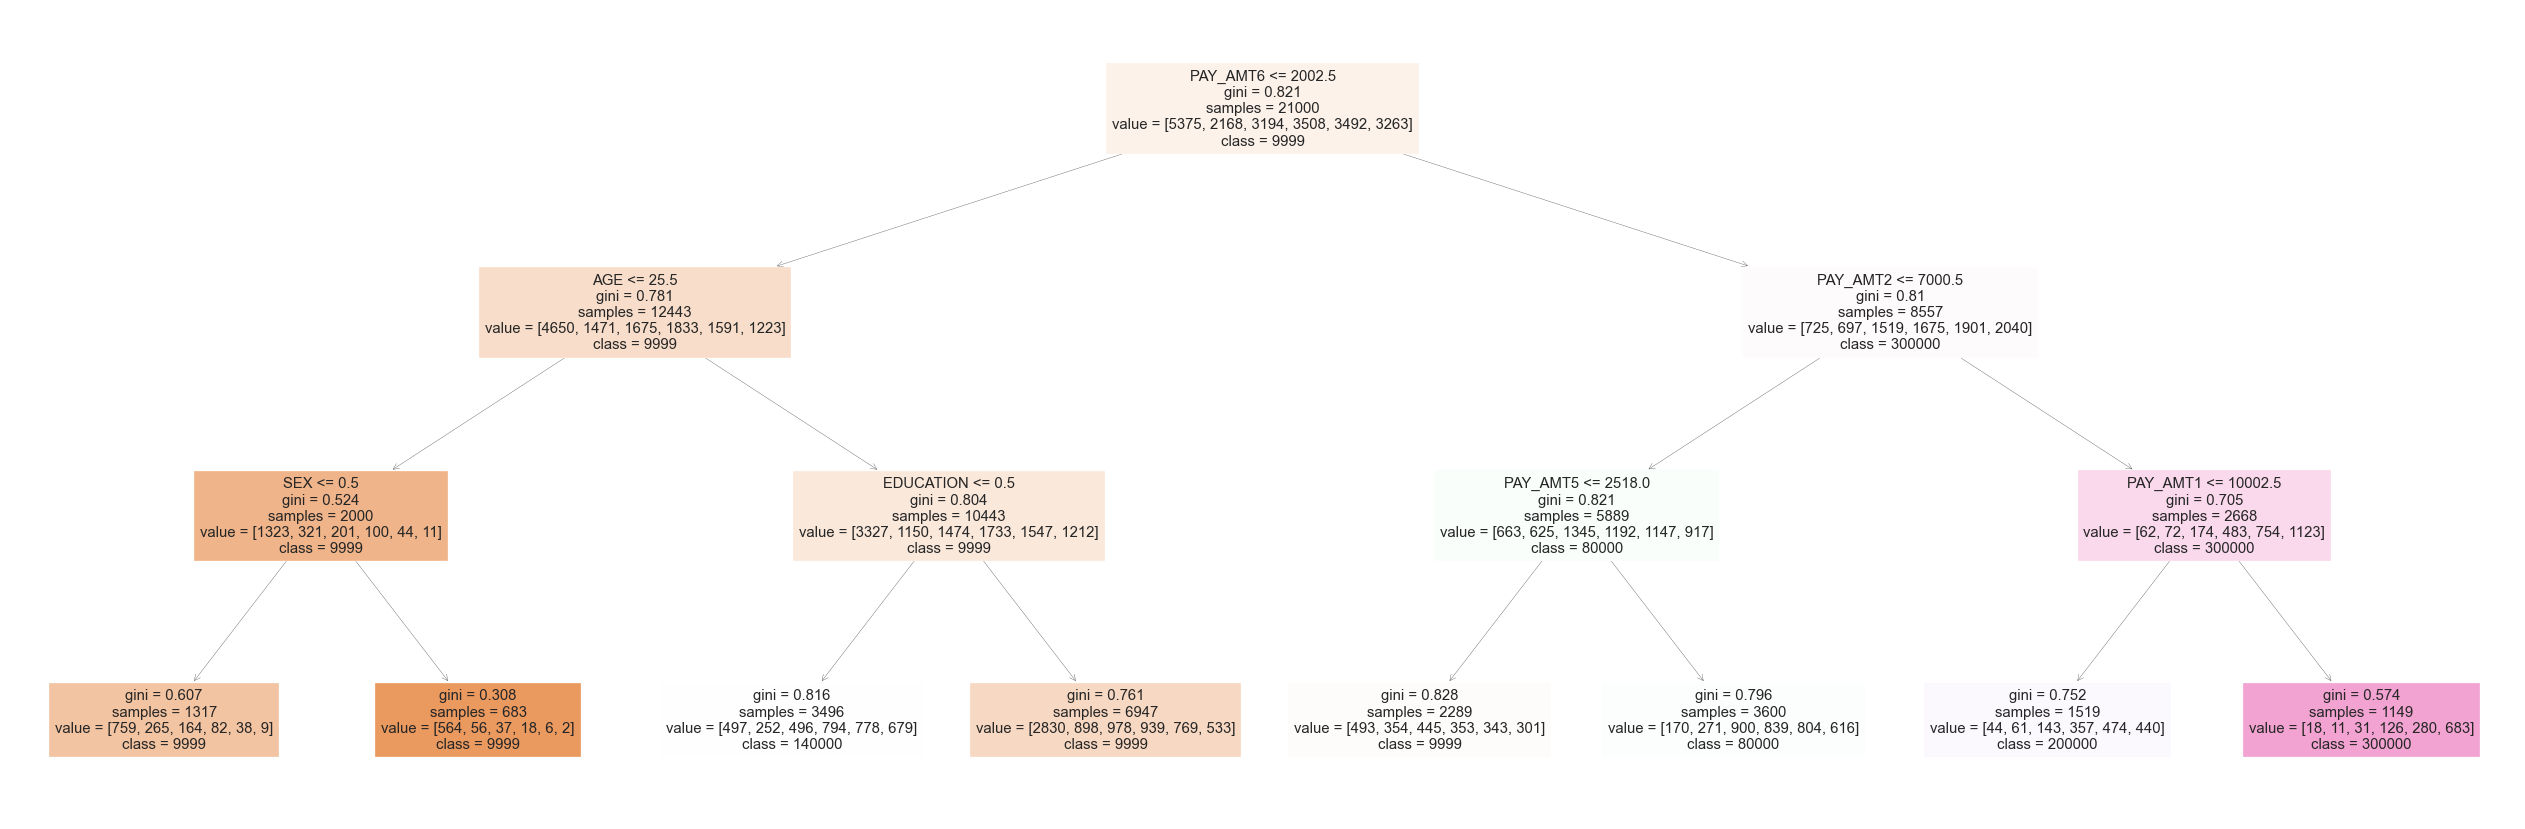

In [81]:
# plot the tree

fig = plt.figure(figsize=(45, 15))
tree = plot_tree(model_dtc, feature_names=X.columns, class_names=['9999', '50000', '80000', '140000', '200000', '300000', '1000000'], filled=True)

### X=edu, marriage,sex,  age, pay_amt1-6, default payment, y=limit_bal

In [71]:
#features
X = rawData.iloc[:,[3,4,5,6,19,20,21,22,23,24,25]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,0,3,1,24,0,689,0,0,0,0,0
1,0,3,2,26,0,1000,1000,1000,0,2000,0
2,0,3,2,34,1518,1500,1000,1000,1000,5000,1
3,0,3,1,37,2000,2019,1200,1100,1069,1000,1
4,1,3,1,57,2000,36681,10000,9000,689,679,1


In [72]:
y=limitbal_qcut
y

0        0
1        2
2        2
3        0
4        0
        ..
29995    4
29996    3
29997    0
29998    1
29999    0
Name: LIMIT_BAL, Length: 30000, dtype: int64

In [73]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 11), (9000, 11))

In [74]:
#split data into traing / test set
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.30, random_state=123)
X_train.shape, X_test.shape

((21000, 11), (9000, 11))

In [75]:
# Modelling (DecisionTreeClassifier)

algo_dtc = DecisionTreeClassifier(max_depth=3)
model_dtc = algo_dtc.fit(X_train, y_train)

In [76]:
# predictions

preds = model_dtc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.41      0.87      0.56      2301
           1       0.00      0.00      0.00       955
           2       0.22      0.26      0.24      1297
           3       0.23      0.21      0.22      1580
           4       0.31      0.12      0.17      1567
           5       0.55      0.20      0.30      1300

    accuracy                           0.35      9000
   macro avg       0.29      0.28      0.25      9000
weighted avg       0.31      0.35      0.29      9000



/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lima/opt/anaconda3/envs/DataScience/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [77]:
# Modelling (RandomForestClassifier)

algo_rfc = RandomForestClassifier(max_depth=5)
model_rfc = algo_rfc.fit(X_train, y_train)

In [78]:
# predictions

preds = model_rfc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.44      0.94      0.60      2301
           1       0.50      0.00      0.01       955
           2       0.32      0.29      0.31      1297
           3       0.31      0.16      0.21      1580
           4       0.37      0.24      0.29      1567
           5       0.47      0.37      0.41      1300

    accuracy                           0.41      9000
   macro avg       0.40      0.33      0.30      9000
weighted avg       0.40      0.41      0.35      9000



In [79]:
# Modelling (GradientBoostingClassifier)

algo_gbc = GradientBoostingClassifier(max_depth=3)
model_gbc = algo_gbc.fit(X_train, y_train)

In [80]:
# predictions

preds = model_gbc.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.55      0.84      0.67      2301
           1       0.34      0.18      0.24       955
           2       0.32      0.31      0.31      1297
           3       0.32      0.25      0.28      1580
           4       0.35      0.29      0.32      1567
           5       0.45      0.41      0.43      1300

    accuracy                           0.43      9000
   macro avg       0.39      0.38      0.37      9000
weighted avg       0.40      0.43      0.41      9000

